In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

c:\users\lisa\appdata\local\continuum\anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
c:\users\lisa\appdata\local\continuum\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# Rubble Buoy
rubble = pd.read_csv('X:/02.Projects/LT JOB 273 - Subtech Saldanha Monitoring/6. Data\All_Buoy_Data/1.AutoSyncBackUp/2016_08_Refurb/Subtech_RubbleBuoy2_TURB1.dat', usecols=['TIMESTAMP', 'TSS_shallow_corr_Med', 'TSS_deep_corr_Med',], skiprows=[2,3], na_values=['-'], index_col=0, parse_dates=True, header=1)
# Inshore Buoy
inshore = pd.read_csv('X:/02.Projects/LT JOB 273 - Subtech Saldanha Monitoring/6. Data\All_Buoy_Data/1.AutoSyncBackUp/2016_08_Refurb/Subtech_InshoreBuoy1_TURB1_App.dat', usecols=['TIMESTAMP', 'TSS_shallow_corr_Med', 'TSS_deep_corr_Med',], skiprows=[2,3], na_values=['-'], index_col=0, parse_dates=True, header=1)

rubble.columns = ['1m ', '3m']
inshore.columns = ['1m', '2m']

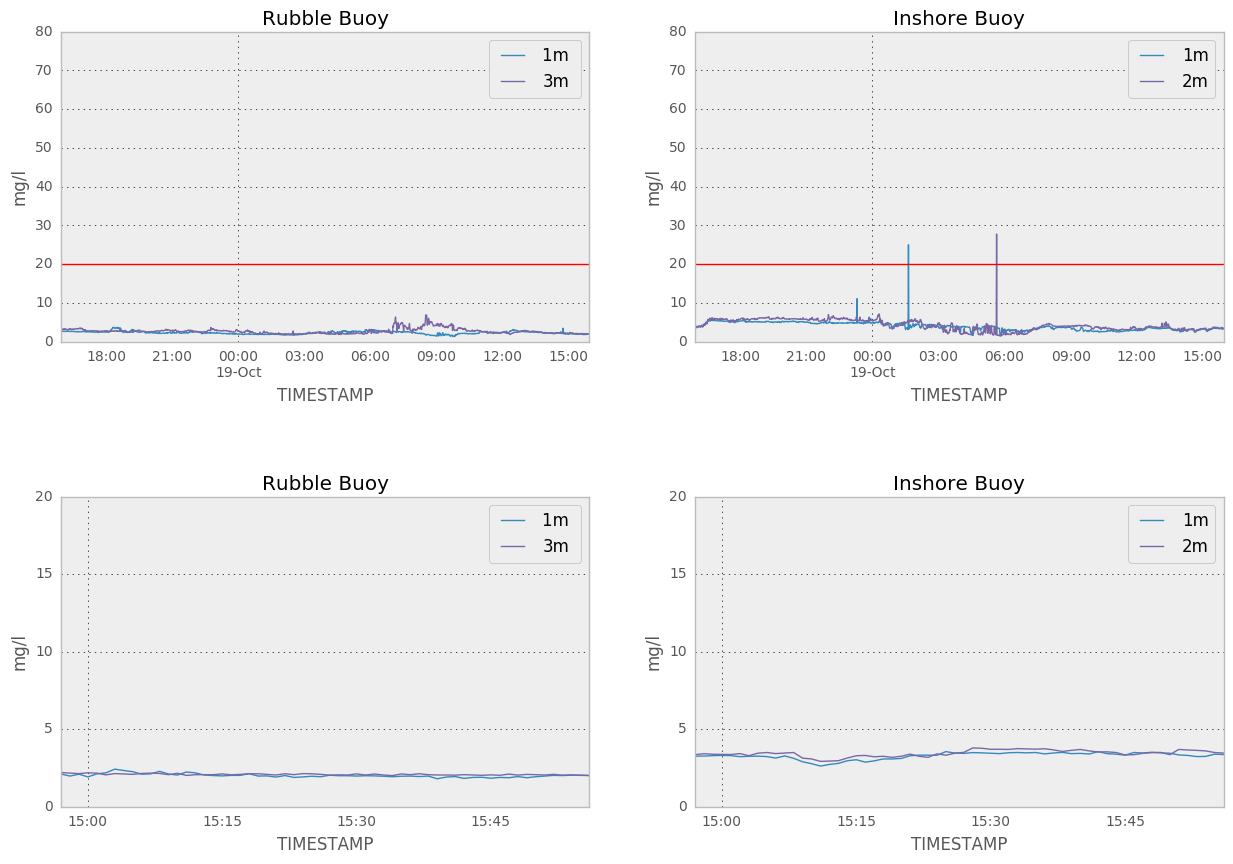

In [3]:
## add subplots so that day and hour are next to each other
# add threshold line and possible alarm

fig, axes = plt.subplots(nrows=2, ncols=2)
# every day
ax = rubble[-1440:].plot(figsize=(15, 10), legend=True, title='Rubble Buoy', ylim=(0, 80), grid="on", ax=axes[0,0])
ax.axhline(y=20, color='r')
ax.set_ylabel('mg/l')
ax1 = inshore[-1440:].plot(figsize=(15, 10), legend=True, title='Inshore Buoy', ylim=(0, 80), ax=axes[0,1])
ax1.axhline(y=20, color='r')
ax1.set_ylabel('mg/l')

# every hour
ax2 = rubble[-60:].plot(figsize=(15, 10), legend=True, title='Rubble Buoy', ylim=(0, 20), ax=axes[1,0])
ax2.set_ylabel('mg/l')
ax3 = inshore[-60:].plot(figsize=(15, 10), legend=True, title='Inshore Buoy', ylim=(0, 20), ax=axes[1,1])
ax3.set_ylabel('mg/l')


In [4]:
%matplotlib inline

import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.io import show, output_notebook, push_notebook, gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, Span
from bokeh.charts import TimeSeries
import datetime

# Rubble Buoy
rubble = pd.read_csv('X:/02.Projects/LT JOB 273 - Subtech Saldanha Monitoring/6. Data\All_Buoy_Data/1.AutoSyncBackUp/2016_08_Refurb/Subtech_RubbleBuoy2_TURB1.dat', usecols=['TIMESTAMP', 'TSS_shallow_corr_Med', 'TSS_deep_corr_Med',], skiprows=[2,3], na_values=['-'], index_col=0, parse_dates=True, header=1)
# Inshore Buoy
inshore = pd.read_csv('X:/02.Projects/LT JOB 273 - Subtech Saldanha Monitoring/6. Data\All_Buoy_Data/1.AutoSyncBackUp/2016_08_Refurb/Subtech_InshoreBuoy1_TURB1_App.dat', usecols=['TIMESTAMP', 'TSS_shallow_corr_Med', 'TSS_deep_corr_Med',], skiprows=[2,3], na_values=['-'], index_col=0, parse_dates=True, header=1)

rubble.columns = ['1m ', '3m']
inshore.columns = ['1m', '2m']

TOOLS="hover,crosshair,pan,wheel_zoom,box_zoom,reset,tap,save,box_select,poly_select,lasso_select"

# create a new plot
rubble_day = TimeSeries(rubble[-1440:], ylabel='mg/l', xlabel='TIME', width=750, height=500, title='Rubble Buoy Last Download %s' % str(rubble.index[-1]), legend=True, tools=TOOLS)
rubble_day.y_range.start = 0
rubble_day.y_range.end = 80
hline = Span(location=20, dimension='width', line_color='red', line_width=3)

# create another one
inshore_day = TimeSeries(inshore[-1440:], ylabel='mg/l', xlabel='TIME', width=750, height=500, title='Inshore Buoy Last Download %s' % str(inshore.index[-1]), legend=True, tools=TOOLS)
inshore_day.y_range.start = 0
inshore_day.y_range.end = 80

rubble_day.renderers.extend([hline])
inshore_day.renderers.extend([hline])

# create and another
rubble_hour = TimeSeries(rubble[-60:], ylabel='mg/l', xlabel='TIME', width=500, height=500, title='Rubble Buoy', legend=True, tools=TOOLS)
rubble_hour.y_range.start = 0
rubble_hour.y_range.end = 20

# create and another
inshore_hour = TimeSeries(inshore[-60:], ylabel='mg/l', xlabel='TIME', width=500, height=500, title='Inshore Buoy', legend=True, tools=TOOLS)
inshore_hour.y_range.start = 0
inshore_hour.y_range.end = 20

# put all the plots in a grid layout
p = gridplot([[rubble_day, rubble_hour], [inshore_day, inshore_hour]])

# show the results
output_file("layout.html", title='Subtech Turbidity Data')
target = show(p, notebook_handle=True)



In [11]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import Figure
from bokeh.io import curdoc

source = ColumnDataSource(dict(x=[], y=[]))
fig = Figure()
fig.line(source=source, x='x', y='y')
fig.line(source=source, x='x', y='y')

ct= 0

def update_data():
    global ct
    ct += 1
    new_data = dict(x=[rubble.index], y=[rubble.TSS_deep_corr_Med])
    source.stream(new_data, 100)
      
curdoc().add_root(fig)
curdoc().add_periodic_callback(update_data, 100)

In [7]:
# Rubble Buoy
rubble = pd.read_csv('X:/02.Projects/LT JOB 273 - Subtech Saldanha Monitoring/6. Data\All_Buoy_Data/1.AutoSyncBackUp/2016_08_Refurb/Subtech_RubbleBuoy2_TURB1.dat', usecols=['TIMESTAMP', 'TSS_shallow_corr_Med', 'TSS_deep_corr_Med',], skiprows=[2,3], na_values=['-'], index_col=0, parse_dates=True, header=1)
# Inshore Buoy
inshore = pd.read_csv('X:/02.Projects/LT JOB 273 - Subtech Saldanha Monitoring/6. Data\All_Buoy_Data/1.AutoSyncBackUp/2016_08_Refurb/Subtech_InshoreBuoy1_TURB1_App.dat', usecols=['TIMESTAMP', 'TSS_shallow_corr_Med', 'TSS_deep_corr_Med',], skiprows=[2,3], na_values=['-'], index_col=0, parse_dates=True, header=1)

rubble.columns = ['1m ', '3m']
inshore.columns = ['1m', '2m']

export = rubble.to_json('rubble_buoy.json', orient='records')

In [8]:
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

display_charts(rubble, chart_type='stock', title="Rubble Buoy")